
## Car Price Prediction

### Objectives:

* Predict the price of a new car based on its attributes to assist potential buyers in estimating costs.
* Gain insights into how various car attributes impact car prices, aiding in market understanding.
* Assess the performance of a linear regression model in predicting car prices using the given data.

In [37]:
# Importing required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Downloading datatset from kaggle API
! kaggle datasets download -d hellbuoy/car-price-prediction

  0%|                                               | 0.00/18.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 18.1k/18.1k [00:00<00:00, 9.16MB/s]


In [3]:
# Extracting dataset file
!unzip 'car-price-prediction.zip'

Archive:  car-price-prediction.zip
  inflating: CarPrice_Assignment.csv  
  inflating: Data Dictionary - carprices.xlsx  


In [113]:
# Loading the dataset
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [114]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [115]:
# Altering the CarName column to CarBrand which will consist only car brand names.
CarBrand = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CarBrand",CarBrand)
df.drop(['CarName'],axis=1,inplace=True)
df.CarBrand = df.CarBrand.str.lower()



In [116]:
df.CarBrand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [117]:
# Correcting car brand names.
def replace_brand_name(a,b):
    df.CarBrand.replace(a,b,inplace=True)

replace_brand_name('vokswagen','volkswagen')
replace_brand_name('vw','volkswagen')
replace_brand_name('maxda','mazda')
replace_brand_name('porcshce','porsche')
replace_brand_name('toyouta','toyota')
replace_brand_name('alfa-romero','alfa-romeo')

df.CarBrand.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [118]:
# Distribution of numerical data
df.describe(exclude='object')

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [119]:
# Checking for null values
df.isnull().sum()

car_ID              0
symboling           0
CarBrand            0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [120]:
# Checking for duplicated values
df.duplicated().sum()

0

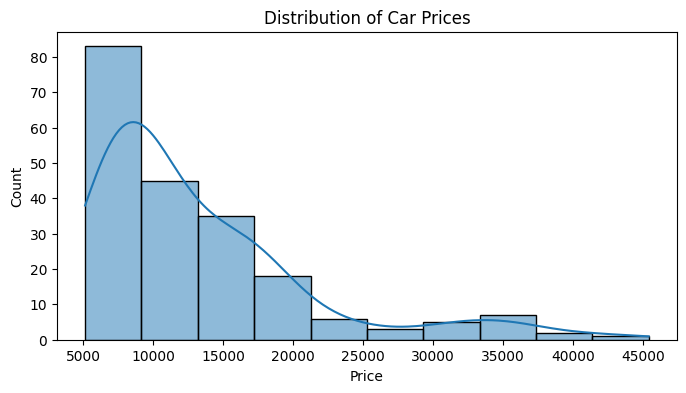

In [121]:
# Distribution of car prices
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=10, kde=True)
plt.xlabel('Price')
plt.title('Distribution of Car Prices')
plt.show()

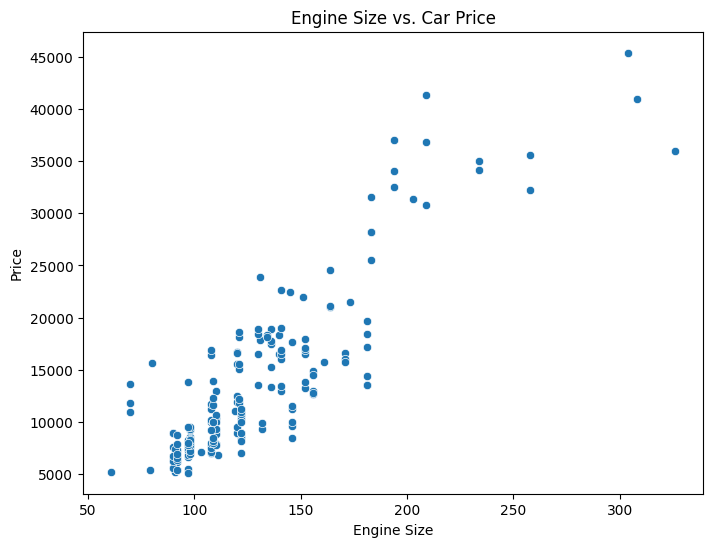

In [122]:
# Realtion between Engibe Size and Car Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='enginesize', y='price', data=df)
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Engine Size vs. Car Price')
plt.show()

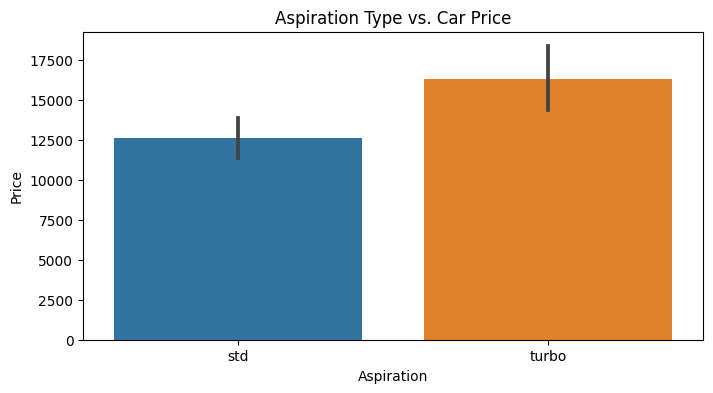

In [123]:
# Effect of Aspiration on Car Price
plt.figure(figsize=(8, 4))
sns.barplot(x='aspiration', y='price', data=df)
plt.xlabel('Aspiration')
plt.ylabel('Price')
plt.title('Aspiration Type vs. Car Price')
plt.show()

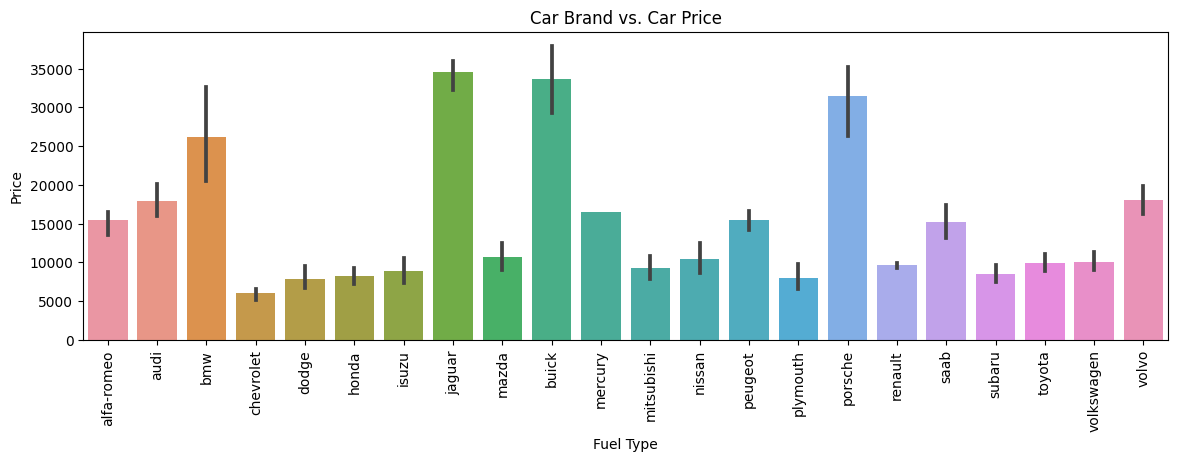

In [131]:
# Relation between Car Brand and Car Price
plt.figure(figsize=(14, 4))
sns.barplot(x='CarBrand', y='price', data=df)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Car Brand vs. Car Price')
plt.xticks(rotation=90)
plt.show()

In [143]:
# Encoding the categorical variables.
df.replace({'CarBrand':{'alfa-romeo':0, 'audi':1, 'bmw':2, 'chevrolet':3, 'dodge':4, 'honda':5,
       'isuzu':6, 'jaguar':7, 'mazda':8, 'buick':9, 'mercury':10, 'mitsubishi':11,
       'nissan':12, 'peugeot':13, 'plymouth':14, 'porsche':15, 'renault':16, 'saab':17,
       'subaru':18, 'toyota':19, 'volkswagen':20, 'volvo':21}},inplace=True)
df.replace({'fueltype':{'gas':0,'diesel':1}},inplace=True)
df.replace({'aspiration':{'std':0,'turbo':1}},inplace=True)
df.replace({'doornumber':{'two':0,'four':1}},inplace=True)
df.replace({'carbody':{'convertible':0, 'hatchback':1, 'sedan':2, 'wagon':3, 'hardtop':4}},inplace=True)
df.replace({'drivewheel':{'rwd':0, 'fwd':1, '4wd':2}},inplace=True)
df.replace({'enginelocation':{'front':0,'rear':1}},inplace=True)
df.replace({'enginetype':{'dohc':0, 'ohcv':1, 'ohc':2, 'l':3, 'rotor':4, 'ohcf':5, 'dohcv':6}},inplace=True)
df.replace({'cylindernumber':{'four':0, 'six':1, 'five':2, 'three':3, 'twelve':4, 'two':5, 'eight':6}},inplace=True)
df.replace({'fuelsystem':{'mpfi':0, '2bbl':1, 'mfi':2, '1bbl':3, 'spfi':4, '4bbl':5, 'idi':6, 'spdi':7}},inplace=True)



In [144]:
df.head()

,car_ID,symboling,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,0,0,0,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,0,0,0,0,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,0,0,0,0,1,0,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,0,0,1,2,1,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,1,0,0,1,2,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [145]:
# Removing unessential columns
df.drop(columns=['car_ID'],inplace=True)

In [146]:
# Linear Regression Model
# Splitting the data into features (X) and target (y)
X = df.drop(columns=['price'])
y = df['price']


In [155]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train);

In [156]:
# Evaluating the model on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)

R-squared: 0.9342822194841193


In [157]:
# Prediction on a new car data
new_car_data = {
    'symboling': [1],
    'CarBrand': [2], #bmw
    'fueltype': [1], #diesel
    'aspiration': [1], #turbo
    'doornumber': [1], #four
    'carbody': [2], #sedan
    'drivewheel': [1], #fwd
    'enginelocation': [0], #front
    'wheelbase': [95.0],
    'carlength': [172.6],
    'carwidth': [65.2],
    'carheight': [50.5],
    'curbweight': [2910],
    'enginetype': [2], #ohc
    'cylindernumber': [0], #four
    'enginesize': [110],
    'fuelsystem': [0], #mpfi
    'boreratio': [3.20],
    'stroke': [3.19],
    'compressionratio': [9.0],
    'horsepower': [90],
    'peakrpm': [5500],
    'citympg': [30],
    'highwaympg': [40],
    'price': [0]  # Placeholder for predicted price
}

In [158]:
# Creating a DataFrame for the new car data
new_car_df = pd.DataFrame(new_car_data)

In [170]:
# Predicting the price for the new car data
new_car_features = new_car_df.drop(columns=['price'])
predicted_price = model.predict(new_car_features)[0]

print("\nPredicted Price for the New Car Data: %0.2f" % predicted_price)


Predicted Price for the New Car Data: 20453.56
